In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as pyplot
%matplotlib inline

In [12]:
filename = 'mental_health_data_true.csv'
data = pd.read_csv(filename)

In [13]:
#look at first few rows of data
data.head(10)

,A,B,C,D,E,F,G,H,I,J,...,BBB,CCC,DDD,EEE,FFF,GGG,HHH,III,JJJ,LLL
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,0,More than 1000,1.0,NaN,Yes,I am not sure,No,Yes,Yes,Somewhat easy,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes
6,0,26-100,1.0,NaN,I don't know,No,No,No,I don't know,Somewhat easy,...,Not applicable to me,Not applicable to me,30,M,United States of America,Tennessee,United States of America,Tennessee,Back-end Developer,Sometimes
7,0,More than 1000,1.0,NaN,Yes,Yes,No,Yes,Yes,Very easy,...,Sometimes,Often,37,female,United States of America,Virginia,United States of America,Virginia,Dev Evangelist/Advocate|Back-end Developer,Always
8,0,26-100,0.0,1.0,I don't know,No,No,No,I don't know,Very difficult,...,Rarely,Often,44,Female,United States of America,California,United States of America,California,Support|Back-end Developer|One-person shop,Sometimes
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Rarely,Often,30,Male,United States of America,Kentucky,United States of America,Kentucky,One-person shop|Front-end Developer|Back-end D...,Always


In [14]:
data.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'BB',
       'CC', 'DD', 'EE', 'FF', 'GG', 'HH', 'II', 'JJ', 'KK', 'LL', 'MM', 'NN',
       'OO', 'PP', 'QQ', 'RR', 'SS', 'TT', 'UU', 'VV', 'WW', 'XX', 'YY', 'ZZ',
       'AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG', 'HHH', 'III', 'JJJ',
       'LLL'],
      dtype='object')

In [15]:
#get dataframe shape
data.shape

(1433, 63)

In [16]:
#Lets look at the column datatypes
data_types = data.dtypes

In [17]:
data_types.value_counts()

object     56
int64       4
float64     3
dtype: int64

In [18]:
#pick out which columns are numerical and see some simple statistics on those columns
data.describe()

,A,C,D,Q,Y,AAA,DDD
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


Clearly all columns above are binary responses (1 for yes 0 for no) except the age column. I think all of these will be valuable in an unsupervised ML model

0    1146
1     287
Name: A, dtype: int64


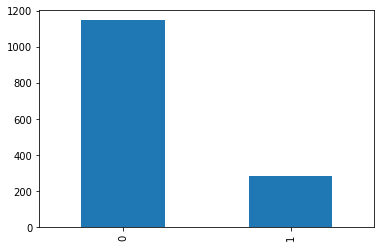

In [19]:
# bar chart - Are you self-employed?
data['A'].value_counts().plot(kind='bar')
print(data['A'].value_counts())

26-100            292
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: B, dtype: int64


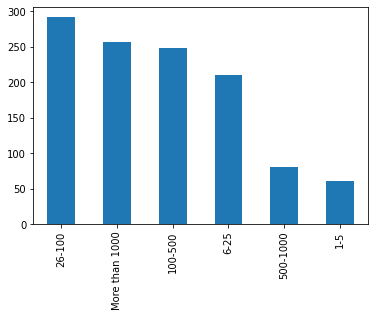

In [20]:
# bar chart - How many employees does your company or organization have?
data['B'].value_counts().plot(kind='bar')
print(data['B'].value_counts())

Looks like we could investigate large companies vs small companies since the survery response from each group are comparable

1.0    883
0.0    263
Name: C, dtype: int64


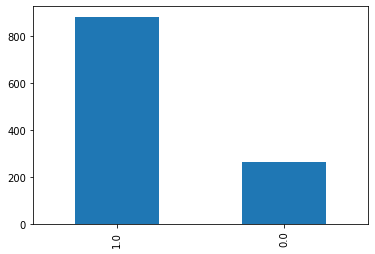

In [21]:
# bar chart - 'Is your employer primarily a tech company/organization?
data['C'].value_counts().plot(kind='bar')
print(data['C'].value_counts())

1.0    248
0.0     15
Name: D, dtype: int64


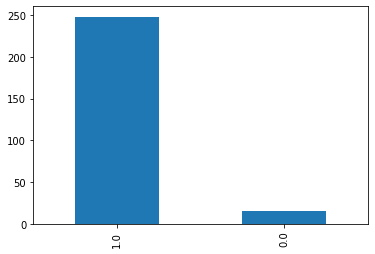

In [22]:
# bar chart - 'Is your employer primarily a tech company/organization?
# this question is linked to the "Is your employer primarily a tech company/organization?" question
data['D'].value_counts().plot(kind='bar')
print(data['D'].value_counts())

Yes      575
No       531
Maybe    327
Name: VV, dtype: int64


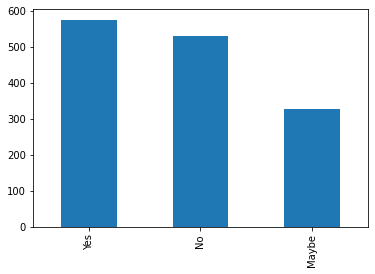

In [23]:
# bar chart - Do you currently have a mental health disorder?
data['VV'].value_counts().plot(kind='bar')
print(data['VV'].value_counts())

Wow, pretty evenly distrubuted

Not applicable to me    557
Sometimes               369
Rarely                  322
Never                   120
Often                    65
Name: BBB, dtype: int64


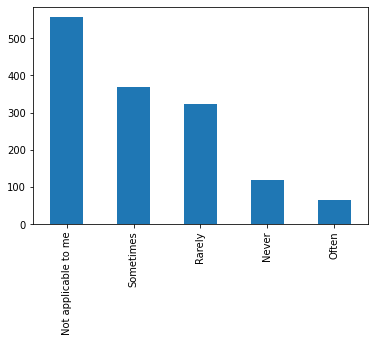

In [24]:
# bar chart - If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?
data['BBB'].value_counts().plot(kind='bar')
print(data['BBB'].value_counts())

Often                   538
Not applicable to me    468
Sometimes               363
Rarely                   52
Never                    12
Name: CCC, dtype: int64


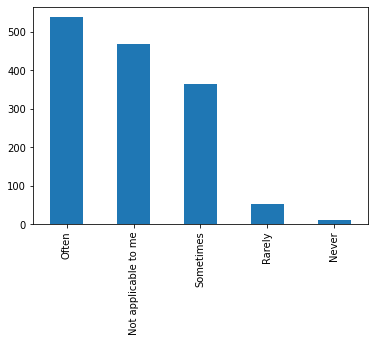

In [25]:
# bar chart - If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?
data['CCC'].value_counts().plot(kind='bar')
print(data['CCC'].value_counts())

1    839
0    594
Name: AAA, dtype: int64


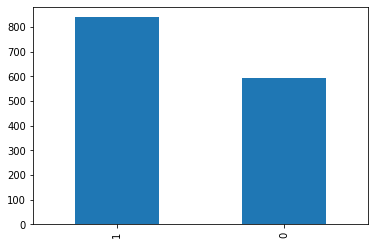

In [26]:
# bar chart - Have you ever sought treatment for a mental health issue from a mental health professional?
data['AAA'].value_counts().plot(kind='bar')
print(data['AAA'].value_counts())

Maybe    487
No       438
Yes      221
Name: K, dtype: int64


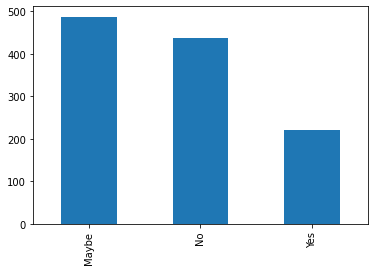

In [27]:
# bar chart - Do you think that discussing a mental health disorder with your employer would have negative consequences?
data['K'].value_counts().plot(kind='bar')
print(data['K'].value_counts())

No              531
I don't know    320
Yes             295
Name: H, dtype: int64


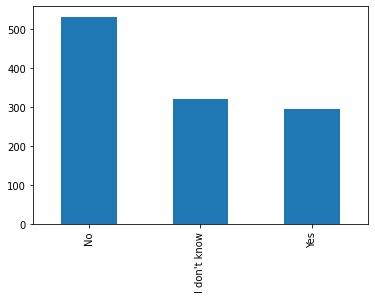

In [28]:
# bar chart - Does your employer offer resources to learn more about mental health concerns and options for seeking help?
data['H'].value_counts().plot(kind='bar')
print(data['H'].value_counts())

No              813
Yes             230
I don't know    103
Name: G, dtype: int64


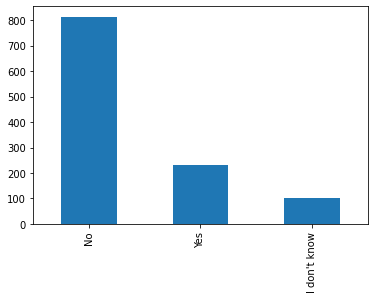

In [29]:
# bar chart - Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
data['G'].value_counts().plot(kind='bar')
print(data['G'].value_counts())

No     1048
Yes      98
Name: P, dtype: int64


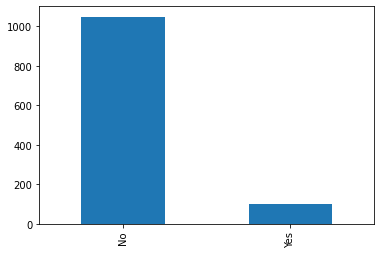

In [30]:
# bar chart - Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
data['P'].value_counts().plot(kind='bar')
print(data['P'].value_counts())

<AxesSubplot:>

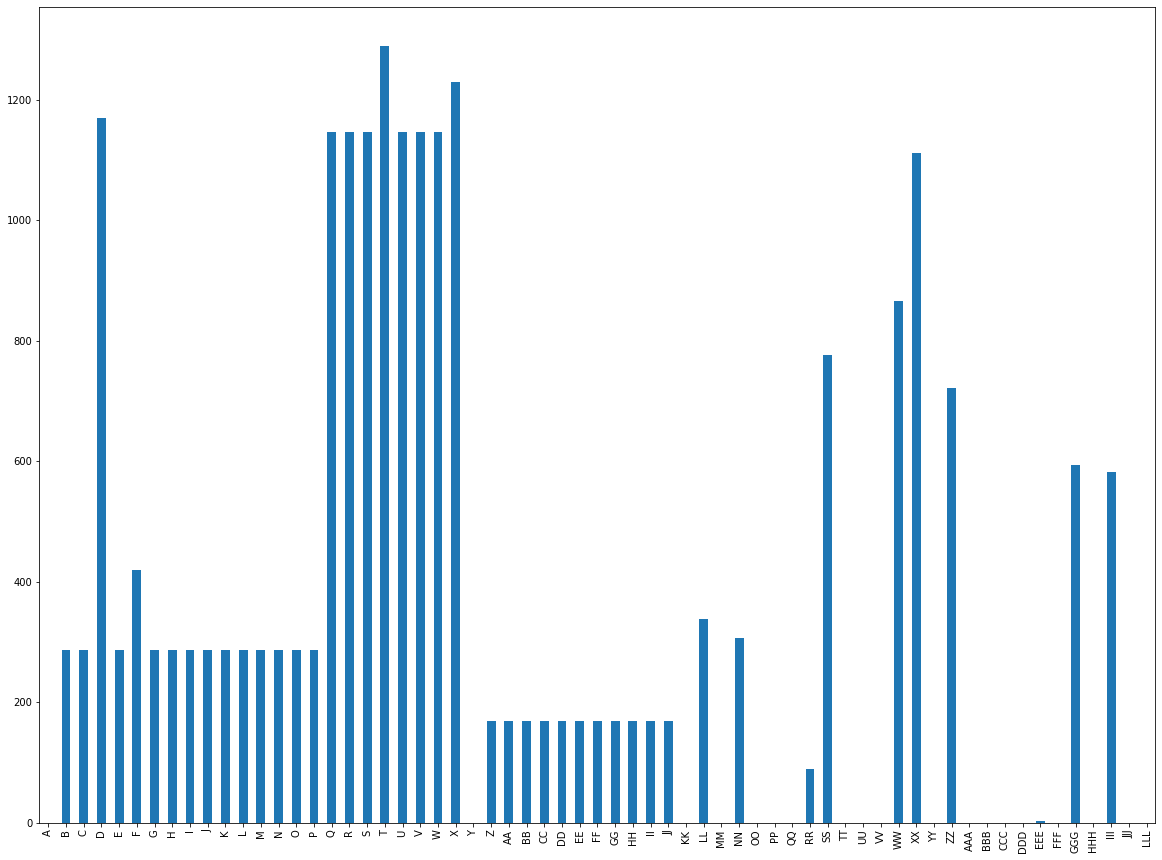

In [31]:
#Trying to see which columns have too many missing values - 
#may want to write out to a file or code column names and make plot larger
data.isna().sum().plot(kind='bar', figsize=(20,15))

In [32]:
temp = data.isna().sum()
print("Column with lowest amount of missings contains {} missing values.".format(temp.min()))
print("Column with highest amount of missings contains {} missing values.".format(temp.max()))

Column with lowest amount of missings contains 0 missing values.
Column with highest amount of missings contains 1289 missing values.
